# **Graded Challenge 1** 
##### **Nama : Achmad Naufal Wijaya J**
##### **Batch : 002**

*Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Basic Python, Numpy, serta Data Preparation with Pandas*


---


## **Dataset Description**
Unduh dataset yang akan digunakan [disini](https://www.kaggle.com/abcsds/pokemon).

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:
*   #: ID for each pokemon
*   Name: Name of each pokemon
*   Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
*   Type 2: Some pokemon are dual type and have 2
*   Total: sum of all stats that come after this, a general guide to how strong a pokemon is
*   HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
*   Attack: the base modifier for normal attacks (eg. Scratch, Punch)
*   Defense: the base damage resistance against normal attacks
*   SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
*   SP Def: the base damage resistance against special attacks
*   Speed: determines which pokemon attacks first each round

---

### **Import Library**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
plt.style.use('seaborn-darkgrid')

### **Loading Data**

In [66]:
df = pd.read_csv("/content/Pokemon.csv")
df.head(10)    #Menampilkan 10 data teratas berdasarkan index

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [67]:
df.info()           #Menampilkan semua kolom beserta tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [68]:
df.describe()          #Menampilkan info statistik dasar pada kolom yang ada

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [69]:
df.isnull().sum()     #Menampilkan jumlah data yang kosong

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Karena masih terdapat banyak data yang kosong pada kolom **Type 2** maka harus dilakukan ***Cleansing Data***

### **Data Cleansing**

In [70]:
df.head(10)   #Menampilkan kembali tabel

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Biasanya pada game pokemon, untuk tipe pokemon yang hanya memiliki 1 jenis ***Type*** maka tipe lainnya akan mengikuti tipe yang pertama

In [71]:
df['Type 2'].fillna(df['Type 1'], inplace = True)

In [72]:
df.head(10)   #Menampilkan hasil cleansing missing value

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


Pada tabel pokemon di atas, terdapat penamaan pokemon yang tidak efektif.

Data tersebut perlu diubah menjadi penamaan yang lebih efektif


In [73]:
df['Name'] = df['Name'].str.replace(".*(?=Mega)", "")

In [74]:
df.head(10) #Hasil cleansing nama

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


Untuk mempercantik tabel. Kolom (#) harus dihilangkan karena terlihat mengganggu ***indexing*** tabel

In [76]:
df = df.drop(['#'],axis=1)

In [77]:
df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


Dapat dilihat bahwa data tersebut sudah rapi dan siap untuk dilakukan ***Exploration*** data

### **Data Exploration**

In [78]:
df.head(10)     #10 Data teratas

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


In [79]:
df.tail(10)     #10 Data terbawah

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,Xerneas,Fairy,Fairy,680,126,131,95,131,98,99,6,True
793,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [80]:
df.sort_values('Speed',ascending=False).head(10)    #Melihat peringkat pokemon dari yang paling cepat

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180,3,True
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
428,DeoxysNormal Forme,Psychic,Psychic,600,50,150,50,150,50,150,3,True
154,Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
71,Mega Alakazam,Psychic,Psychic,590,55,50,65,175,95,150,1,False
429,DeoxysAttack Forme,Psychic,Psychic,600,50,180,20,180,20,150,3,True
19,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
275,Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
678,Accelgor,Bug,Bug,495,80,70,40,100,60,145,5,False
164,Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True


In [81]:
df.sort_values('Speed',ascending=False).tail(10)    #Melihat peringkat pokemon dari yang paling lambat

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
188,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
187,Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
219,Pineco,Bug,Bug,290,50,65,90,35,35,15,2,False
651,Foongus,Grass,Poison,294,69,55,45,55,55,15,5,False
209,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
658,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
486,Bonsly,Rock,Rock,290,50,80,95,10,45,10,4,False
359,Trapinch,Ground,Ground,290,45,100,45,45,45,10,3,False
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
495,Munchlax,Normal,Normal,390,135,85,40,40,85,5,4,False


Dapat dilihat bahwa pokemon dengan tingkat kecepatan paling tinggi adalah **DeoxysSpeed Forme** dan yang paling rendah adalah **Munchlax**

In [82]:
print('Unique Type 1 Pokemon : ',df['Type 1'].unique())
print('Unique Type 2 Pokemon : ',df['Type 2'].unique())

Unique Type 1 Pokemon :  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Unique Type 2 Pokemon :  ['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost']


In [83]:
print('Total Unique Type 1 Pokemon :',df['Type 1'].nunique()) 
print('Total Unique Type 2 Pokemon :',df['Type 2'].nunique()) 

Total Unique Type 1 Pokemon : 18
Total Unique Type 2 Pokemon : 18


In [84]:
print(df['Type 1'].value_counts(), '\n' ,df['Type 2'].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64 
 Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Ice         27
Steel       27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64


Mari bandingkan total stats dari pokemon berdasarkan tipe ***Unique*** yang dimiliki

In [85]:
%matplotlib inline

In [86]:
slowest_pokemon = df['Speed'].min()
quickest_pokemon = df['Speed'].max()

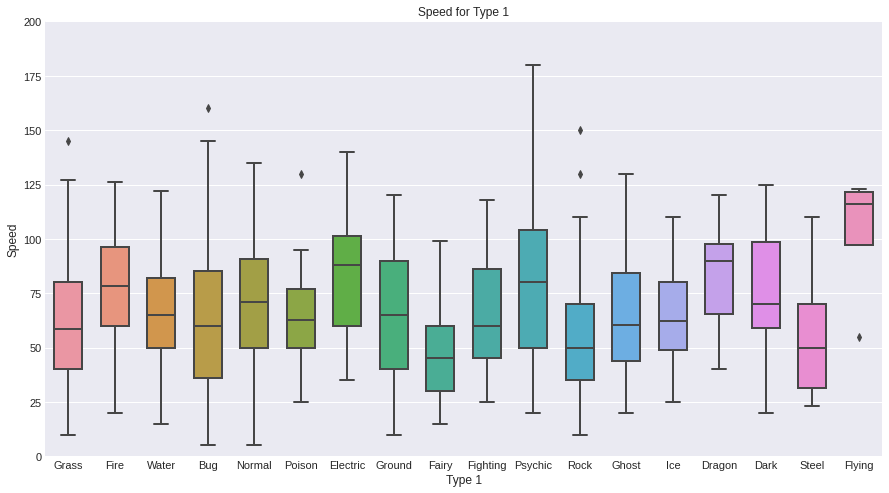

In [87]:
plt.subplots(figsize = (15,8))
plt.title('Speed for Type 1')
sns.boxplot(x = "Type 1", y = "Speed",data = df, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Bisa dilihat bahwa untuk **Type 1** pokemon yang memiliki **Maksimum** ***Speed*** palling tinggi adalah dengan tipe ***Psychic***

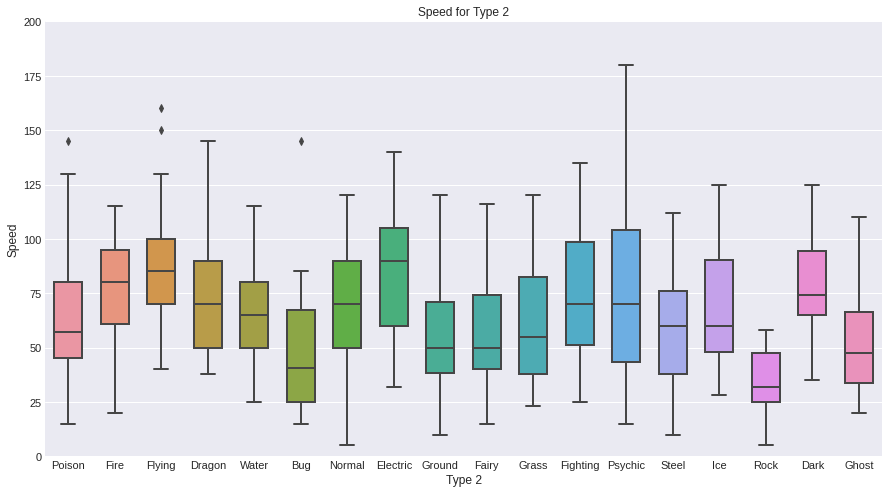

In [88]:
plt.subplots(figsize = (15,8))
plt.title('Speed for Type 2')
sns.boxplot(x = "Type 2", y = "Speed",data = df, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Sama seperti **Type 1** , data tersebut menunjukkan bahwa tipe ***Psychic*** masih memiliki **Maximum** ***Speed*** paling tinggi daripada yang lain 

Karena dari data sebaran ***Speed*** di tiap ***Type*** masih memiliki nilai yang hampir sama. Mari mencari rata-rata ***Speed*** agar bisa melihat kesimpulan

In [89]:
average_speed_T1 = df.groupby("Type 1", sort=False)["Speed"].mean()

In [90]:
average_speed_T2 = df.groupby("Type 2", sort=False)["Speed"].mean()

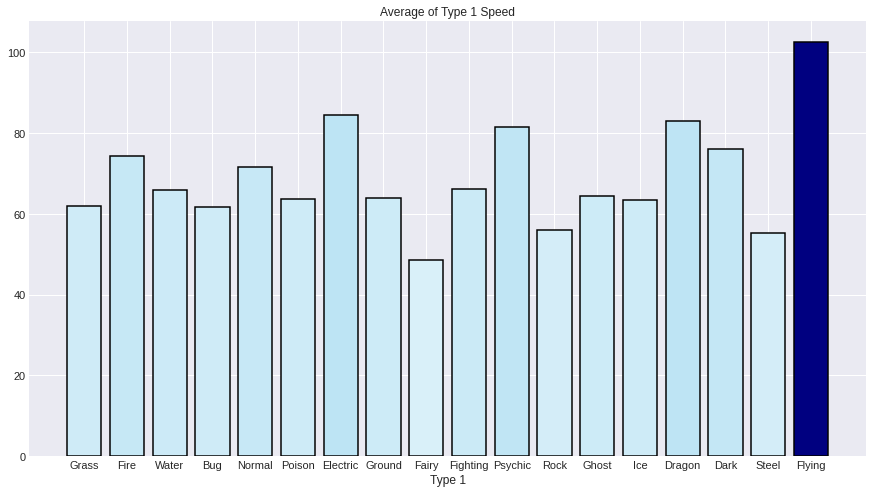

In [91]:
plt.subplots(figsize = (15,8))
values_colour = average_speed_T1
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "skyblue", "navy"])
plt.bar(df['Type 1'].unique(),average_speed_T1, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 1')
plt.title('Average of Type 1 Speed')
plt.show()


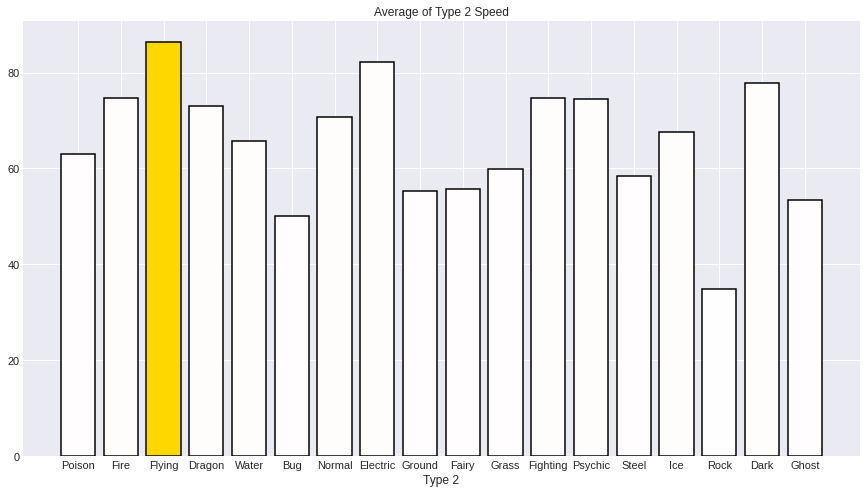

In [92]:
plt.subplots(figsize = (15,8))
values_colour = average_speed_T2
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "snow", "gold"])
plt.bar(df['Type 2'].unique(),average_speed_T2, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 2')
plt.title('Average of Type 2 Speed')
plt.show()


Ternyata setelah melihat grafik perbandingan rata-rata ***Speed*** dari tiap ***Type 1*** dan ***Type 2*** bisa dilihat bahwa **Type Flying** memiliki rata-rata pokemon dengan kecepatan yang sangat tinggi

Sekarang mari lihat untuk perbandingan rata-rata ***Speed*** tiap **Generation**

In [93]:
average_speed_gen = df.groupby("Generation", sort=False)["Speed"].mean()

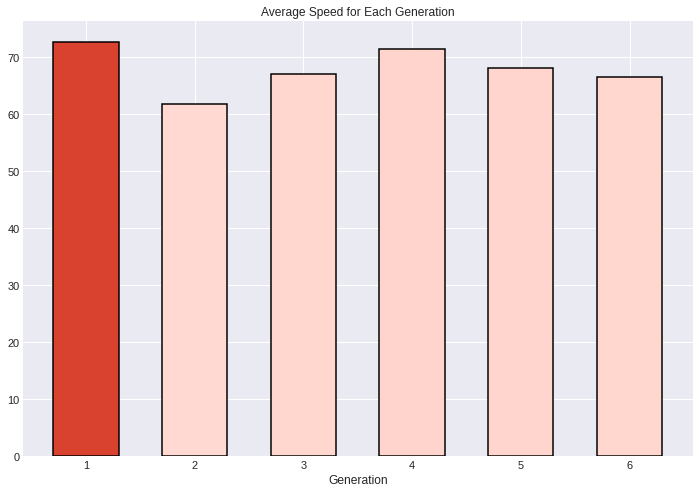

In [94]:
plt.subplots(figsize = (12,8))
values_colour = average_speed_gen.values/average_speed_gen.values.max()
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*7))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "tomato", "darkred"])
plt.bar(df['Generation'].unique(),average_speed_gen, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black', width = 0.6)
plt.xlabel('Generation')
plt.title('Average Speed for Each Generation')
plt.show()


Bisa dilihat pada grafik di atas bahwa untuk perbandingan rata-rata kecepatan tiap **Generation**. **Generation 1** memiliki tingkat kecepatan yang lebih tinggi daripada **Generation** lain

Karena dari grafik di atas mendapatkan hasil bahwa **Generation 1** merupakan **Generation** yang memiliki rata-rata kecepatan pokemon paling tinggi

Maka sekarang mari lihat tipe pokemon apa di **Generation 1** yang memiliki rata-rata kecepatan paling tinggi

In [95]:
df_g1 =df[df['Generation'] == 1]      #Variabel baru untuk data pokemon Generation 1

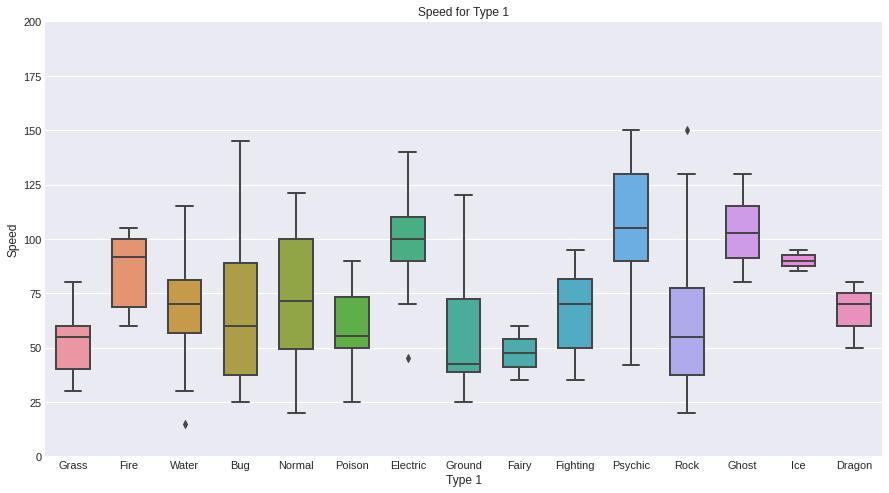

In [96]:
plt.subplots(figsize = (15,8))
plt.title('Speed for Type 1')
sns.boxplot(x = "Type 1", y = "Speed",data = df_g1, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

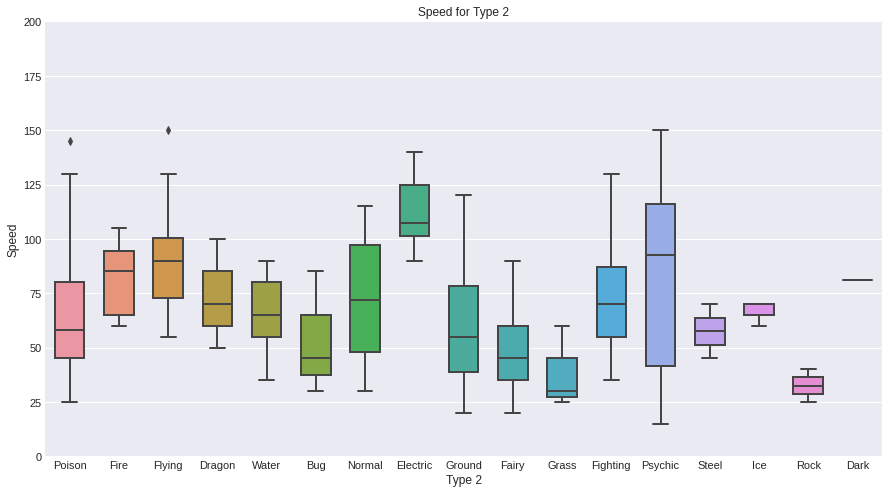

In [97]:
plt.subplots(figsize = (15,8))
plt.title('Speed for Type 2')
sns.boxplot(x = "Type 2", y = "Speed",data = df_g1, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Dari kedua grafik di atas dapat dilihat bahwa rentangan pada ***Type 1 = Psychic*** masih cukup besar namun memiliki nilai maks paling tinggi daripada semua **Type** . Untuk pokemon ***Type 2 = Electric*** tingkat sebaran lebih tinggi daripada **Type** lain. Selanjutnya mari kita lihat rata-rata kecepatan pada tiap **Type** di ***Generation 1*** untuk melihat tipe apa yang memiliki rata-rata kecepatan paling tinggi di ***Generation 1***

In [98]:
df_G1T1 = df[df['Generation'] == 1].sort_values(by = 'Type 1')      #Variabel baru untuk data pokemon Generation 1 Type 1
average_speed_T1G1 = df_G1T1.groupby("Type 1")["Speed"].mean()

In [99]:
df_G1T2 = df[df['Generation'] == 1].sort_values(by = 'Type 2')      #Variabel baru untuk data pokemon Generation 1 Type 2
average_speed_T2G1 = df_G1T2.groupby("Type 2")["Speed"].mean()

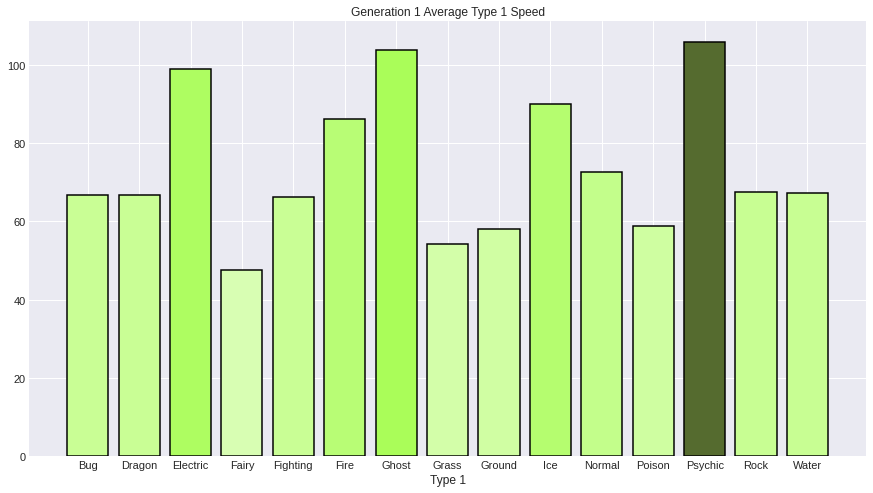

In [100]:
plt.subplots(figsize = (15,8))
values_colour = average_speed_T1G1
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "lawngreen", "darkolivegreen"])
plt.bar(df_G1T1['Type 1'].unique(),average_speed_T1G1, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 1')
plt.title('Generation 1 Average Type 1 Speed')
plt.show()


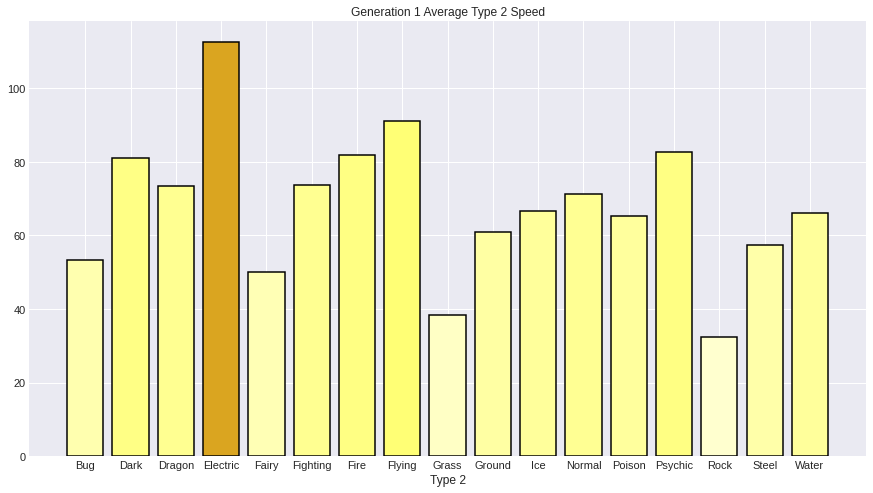

In [101]:
plt.subplots(figsize = (15,8))
values_colour = average_speed_T2G1
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "yellow", "goldenrod"])
plt.bar(df_G1T2['Type 2'].unique(),average_speed_T2G1, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 2')
plt.title('Generation 1 Average Type 2 Speed')
plt.show()


Dari data tersebut, bisa dilihat bahwa rata-rata pokemon dengan kecepatan tinggi untuk ***Type 1*** adalah tipe **Psychic** dan untuk ***Type 2*** adalah **Electric**

Selanjutnya mari lihat perbandingan kecepatan pokemon ***Legendary*** dan ***Normal*** untuk semua generasi

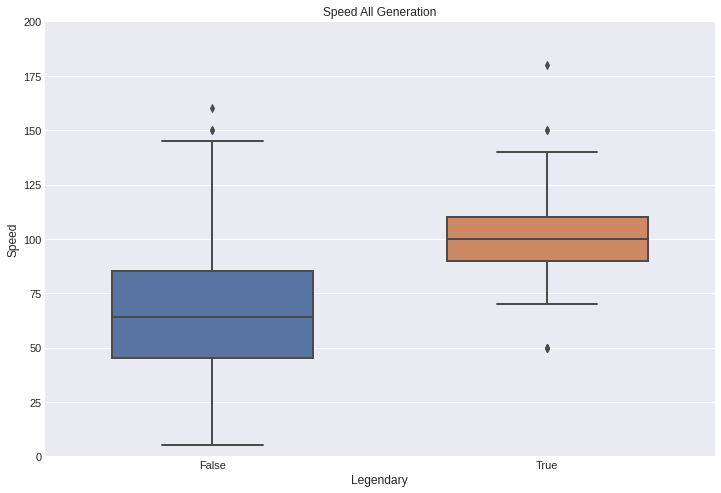

In [102]:
plt.subplots(figsize = (12,8))
plt.title('Speed All Generation')
sns.boxplot(x = "Legendary", y = "Speed",data = df, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Dari grafik tersebut, bisa dilihat bahwa untuk semua ***Generation***. Pokemon **Legendary** masih memiliki rentang data kecepatan yang cukup tinggi

Bagaimana dengan rata-rata kecepatan tiap ***Type*** antar pokemon ***Legendary***? Mari buat grafiknya

In [103]:
df_legendary = df[df['Legendary'] == True]      #Variabel baru untuk data pokemon Legendary

In [104]:
df_legendaryT1 = df_legendary.sort_values(by = 'Type 1')
average_speed_TGL1 = df_legendaryT1.groupby("Type 1")["Speed"].mean()

In [105]:
df_legendaryT2 = df_legendary.sort_values(by = 'Type 2')
average_speed_TGL2 = df_legendaryT2.groupby("Type 2")["Speed"].mean()

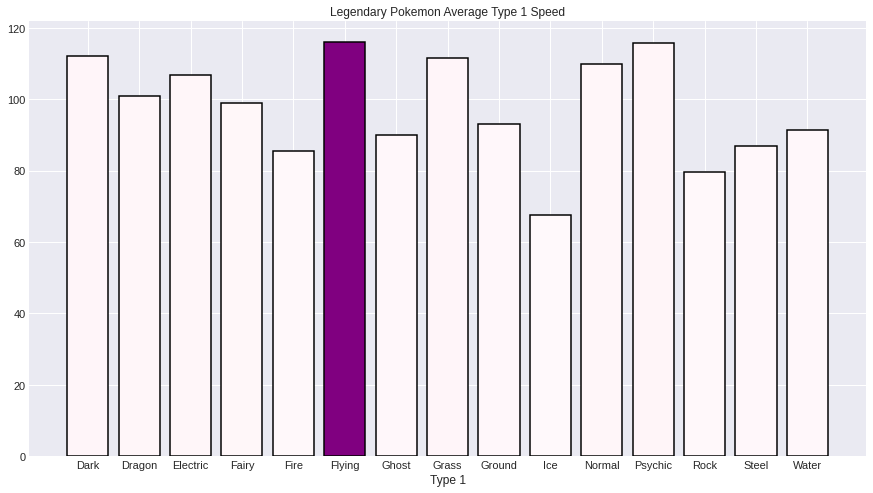

In [106]:
plt.subplots(figsize = (15,8))
values_colour = average_speed_TGL1
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "lavenderblush", "purple"])
plt.bar(df_legendaryT1['Type 1'].unique(),average_speed_TGL1, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 1')
plt.title('Legendary Pokemon Average Type 1 Speed')
plt.show()


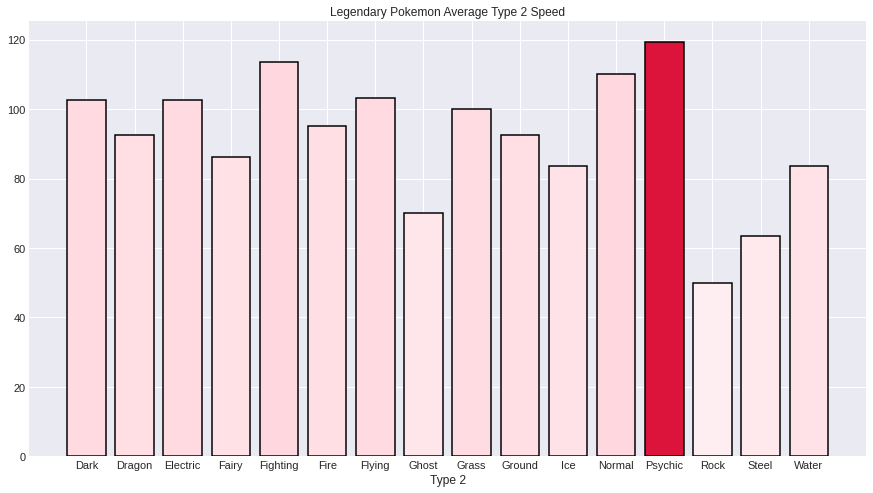

In [107]:
plt.subplots(figsize = (15,8))
values_colour = average_speed_TGL2
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "pink", "crimson"])
plt.bar(df_legendaryT2['Type 2'].unique(),average_speed_TGL2, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 2')
plt.title('Legendary Pokemon Average Type 2 Speed')
plt.show()


Ternyata untuk pokemon ***Legendary***. Tipe pokemon dengan ***Type 1*** yang memiliki rata-rata paling cepat adalah **Flying**. Sementara itu untuk ***Type 2*** yang memiliki rata-rata paling cepat adalah **Psychic** 

# **Kesimpulan**
Berdasarkan data yang telah diperoleh, dapat diperoleh hasil bahwa
*   Pokemon dengan kecepatan paling tinggi adalah **DeoxysSpeed Forme** dan yang paling rendah adalah **Munchlax** 
*   Tipe pokemon yang memiliki rata-rata kecepatan paling tinggi di semua generasi adalah **Flying** untuk ***Type 1*** dan ***Type 2***
*   Generasi yang memiliki rata-rata pokemon tercepat adalah ***Generation 1***
*   Untuk tipe pokemon di generasi tercepat yaitu ***Generation 1***, tipe pokemon **Psychic** memiliki rata-rata kecepatan paling tinggi di ***Type 1*** dan tipe **Electric** memiliki rata-rata kecepatan paling tinggi di ***Type 2***
*   Dari hasil perbandingan pokemon ***Normal*** dan pokemon ***Legendary***, pokemon dengan jenis ***Legendary*** memiliki sebaran kecepatan yang cukup tinggi dibandingkan dengan pokemon ***Normal***
*   Tipe **Flying** pada ***Type 1*** dan tipe **Psychic** pada ***Type 2*** memiliki rata-rata paling tinggi untuk jenis pokemon ***Legendary***

**KESIMPULAN :** Jika pemain ingin memilih tipe pokemon dengan tingkat kecepatan paling tinggi daripada tipe lain, disarankan untuk memilih pokemon yang memiliki ***Type 1/2 = Flying*** . Selain itu jika ingin memiliki pokemon ***Generation 1*** disarankan memilih untuk **Type 1 = Psychic** atau **Type 2 = Electric**. 

<font color="red"> **HIGHLY RECOMMENDED**</font>
Untuk pokemon jenis ***Legendary*** sangat disarankan untuk memilih tipe **Flying** untuk ***Type 1*** dan **Psychic** untuk ***Type 2***








